[[86, 183], [115, 177], [135, 193], [92, 186], [21, 49], [27, 162], [59, 90], [126, 163], [26, 140], [136, 172], [168, 11], [29, 167], [130, 182], [123, 62], [135, 67], [2, 129], [58, 22], [167, 69], [56, 193], [42, 11], [173, 29], [119, 21], [137, 184], [124, 198], [170, 115], [126, 13], [180, 91], [73, 156], [170, 62], [81, 196], [125, 105], [127, 84], [105, 136], [129, 46], [57, 113], [95, 124], [145, 182], [167, 14], [164, 34], [150, 43], [8, 87], [178, 76], [184, 188], [51, 3], [199, 154], [60, 132], [168, 76], [12, 139], [186, 26], [139, 94], [170, 195], [178, 34], [1, 67], [102, 97], [92, 117], [156, 52], [80, 101], [41, 86], [89, 65], [19, 44], [129, 40], [117, 31], [171, 97], [75, 81], [127, 109], [56, 167], [153, 97], [165, 186], [83, 106], [24, 19], [71, 128], [29, 132], [19, 103], [168, 70], [115, 108], [149, 140], [123, 196], [45, 18], [51, 46], [155, 121], [88, 179], [28, 164], [150, 41], [100, 193], [164, 34], [114, 124], [56, 187], [91, 143], [165, 27], [136, 59], [151,

Press 1 for Random Cluster Centers
Press 2 for Input Cluster Centers
 1
[[135, 193], [86, 183], [115, 177]]
('iteration = ', 21)
('cluster centers = ', [[141.71835443037975, 151.99367088607596], [38.050561797752806, 113.4185393258427], [131.40853658536585, 45.823170731707314]])
('clusters = ', [[[86, 183], [115, 177], [135, 193], [92, 186], [126, 163], [136, 172], [130, 182], [137, 184], [124, 198], [170, 115], [81, 196], [125, 105], [105, 136], [95, 124], [145, 182], [184, 188], [199, 154], [170, 195], [171, 97], [127, 109], [165, 186], [115, 108], [149, 140], [123, 196], [155, 121], [88, 179], [100, 193], [114, 124], [91, 143], [129, 128], [117, 169], [196, 117], [143, 124], [125, 172], [139, 105], [186, 154], [107, 197], [143, 99], [168, 146], [136, 120], [150, 179], [131, 173], [94, 133], [181, 199], [196, 99], [173, 159], [95, 190], [142, 176], [107, 136], [172, 148], [187, 142], [172, 113], [104, 121], [150, 127], [81, 196], [190, 98], [190, 124], [155, 132], [169, 179], [84, 179

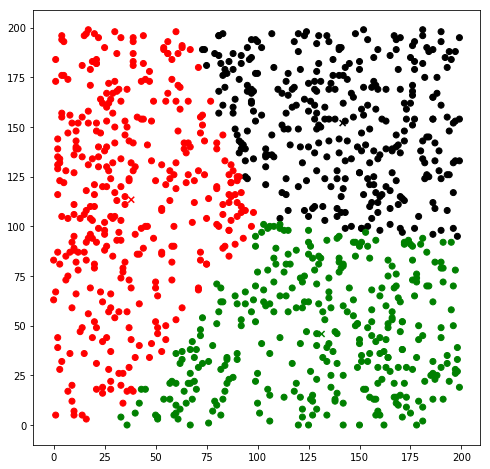

done


'\nfrom sklearn.cluster import KMeans\nimport numpy as np\nX = np.array([[1, 2], [3, 4], [5,6],[2,5],[6,7],[8,9],[4,10]])\nX = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])\nkmeans = KMeans(n_clusters=3, random_state=0).fit(X)\nprint kmeans.labels_\n#kmeans.labels_\n#array([0, 0, 0, 1, 1, 1], dtype=int32)\n\n#array([0, 1], dtype=int32)print \nprint kmeans.cluster_centers_\n'

In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  4 10:38:11 2018

@author: rizvee
"""
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mlt

class K_Means_Clusturing:
    def __init__(self,n):
        self.points=[] 
        self.k=n
        self.cluster_center=[]
        self.clusters = []
        pass 
    def read(self,filename):
        f=open(filename,"r")
        lines = f.readlines()
        f.close()
        for i in lines:
            temp=i.split()
            for j in range(0,len(temp)):
                temp[j]=int(temp[j])
            self.points.append(temp)
        print self.points
        return 
    def initialization(self):
        choice = int(input("Press 1 for Random Cluster Centers\nPress 2 for Input Cluster Centers\n "))
        if(choice == 1):
            while(len(self.cluster_center) != self.k):
                v=random.randint(-1,self.k-1) #generates between 0 to k-1 
                if(self.points[v] not in self.cluster_center):
                    self.cluster_center.append(self.points[v])
            print (self.cluster_center)
        else:
            while(len(self.cluster_center) !=self. k):
                v=int(input("Index number which will be clusters: "))
                if(self.points[v] not in self.cluster_center):
                    self.cluster_center.append(self.points[v])
                else:
                    print ("This index is already been considered for center")
            print (self.cluster_center)
        return 
    def disimilarity(self,point,center):
        value = 0.0
        for i in range(0,len(point)):
            v = (point[i]-center[i]) * (point[i]-center[i])
            value = value + v 
        return value
    def find_center(self,list_of_points):
        sum_value = []
        for i in range(0,len(list_of_points[0])):
            sum_value.append(0)
        for i in range(0,len(list_of_points)):
            temp = list_of_points[i]
            for j in range(0,len(temp)):
                sum_value[j]=sum_value[j]+temp[j]
        for i in range(0,len(sum_value)):
            sum_value[i]=(sum_value[i]*1.0)/(len(list_of_points))
        return sum_value 
    def make_cluster(self):
        iteration = 0
        same=0
        while(True):
            iteration=iteration+1
            partitions = []
            for i in range(0,len(self.cluster_center)):
                temp = []
                partitions.append(temp) 
            for i in range(0,len(self.points)):
                temp=self.points[i]
                mx_disimilarity = 100000000000
                found_center = -1
                for j in range(0,len(self.cluster_center)):
                    center = self.cluster_center[j]
                    diff = self.disimilarity(temp,center)
                    if(mx_disimilarity>diff):
                        mx_disimilarity=diff
                        found_center=j 
                partitions[found_center].append(self.points[i])
            #print "partitions = ",partitions
            if(partitions == self.clusters):
                same=same+1
                if(same==10):
                    break 
            else:
                self.clusters=partitions
                same=0
                self.cluster_center = []
                for i in self.clusters:
                    new_center = self.find_center(i)
                    self.cluster_center.append(new_center)
            
        print ("iteration = ",iteration) 
        print ("cluster centers = ",self.cluster_center)
        print ("clusters = ",self.clusters)
        self.show_clusters(self.clusters,self.cluster_center)
        return
    def show_clusters(self,point_list,centers):
        n=len(point_list)
        color_list = ['black','red','green','yellow','blue']
        counter=-1
        count_point=0
        for i in point_list:
            for j in i:
                count_point=count_point+1
        x = np.zeros(count_point)
        y = np.zeros(count_point)
        z = np.zeros(count_point)
        colors=[]
        jog=0
        for i in point_list:
            jog=jog+1
            colors.append(color_list[jog-1])
            for j in i:
                counter=counter+1
                x[counter]=j[0]
                y[counter]=j[1]
                z[counter]=jog 
        fig=plt.figure(figsize=(8,8))
        
        
        count_point=len(centers)
        x_c=np.zeros(count_point)
        y_c=np.zeros(count_point)
        z_c=np.zeros(count_point)
        
        jog=-1
        col=0
        for i in centers:
            jog=jog+1
            col=col+1
            x_c[jog]=i[0]
            y_c[jog]=i[1]
            z_c[jog]=col
        
        
        plt.scatter(x,y,c=z,cmap=mlt.colors.ListedColormap(colors))
        plt.scatter(x_c,y_c,c=z_c,marker='x',cmap=mlt.colors.ListedColormap(colors))
        plt.show()
        return 
    
    
    

    

def main():
    obj = K_Means_Clusturing(3)
    #obj.read("input.txt") 
    obj.read("inputdip.txt") 
    obj.initialization()
    obj.make_cluster()

main() 
print ("done")

"""
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [3, 4], [5,6],[2,5],[6,7],[8,9],[4,10]])
X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print kmeans.labels_
#kmeans.labels_
#array([0, 0, 0, 1, 1, 1], dtype=int32)

#array([0, 1], dtype=int32)print 
print kmeans.cluster_centers_
"""






